In [212]:
# 기본 import 패키지
from IPython.display import display
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import mglearn
# 한글출력
matplotlib.rc('font', family='D2Coding')

temp = pd.read_csv('DUIH_test.csv') 
#duih={'feature_names':['ApEn','A_W','A_O','A_E','A_F','A_T','A_C','A_OP','A_OF','A_OT','A_OC','A_OOP','A_EF','A_ET','A_EC','A_EOP']}
temp.shape

(85, 18)

In [213]:
temp.head()

,target,s-cloz,ApEn,A_W,A_O,A_E,A_F,A_T,A_C,A_OP,A_OF,A_OT,A_OC,A_OOP,A_EF,A_ET,A_EC,A_EOP
0,1,480.3,0.952740,0.651148,0.639038,0.661526,0.604434,0.686884,0.755399,0.637483,0.570801,0.747604,0.729550,0.587570,0.634020,0.626164,0.791352,0.673232
1,1,721.0,0.907537,0.501377,0.496260,0.502146,0.512273,0.411361,0.523955,0.535571,0.502208,0.453171,0.561535,0.497788,0.561355,0.369551,0.502424,0.545790
2,0,229.8,1.396322,1.018389,1.037752,0.984776,0.978568,1.018475,1.042003,1.059619,1.015203,1.049231,1.028702,1.064621,0.936129,0.987718,1.055104,1.019641
3,1,481.7,1.197080,0.626900,0.620851,0.612424,0.665127,0.594748,0.482613,0.669508,0.708439,0.574425,0.535854,0.578393,0.581922,0.615071,0.383575,0.769953
4,1,367.1,1.263214,0.554541,0.536790,0.551437,0.710309,0.451542,0.322679,0.531447,0.702878,0.407007,0.398351,0.486662,0.713213,0.496077,0.236437,0.521634


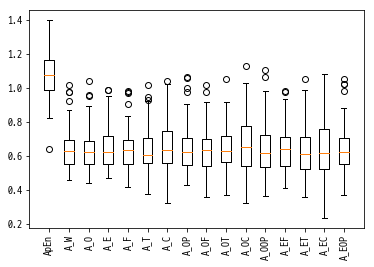

In [216]:
# 데이터 분포
plt.boxplot(temp.iloc[:,2:].T, manage_xticks=False)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], temp.columns[2:], rotation='vertical')
plt.show()

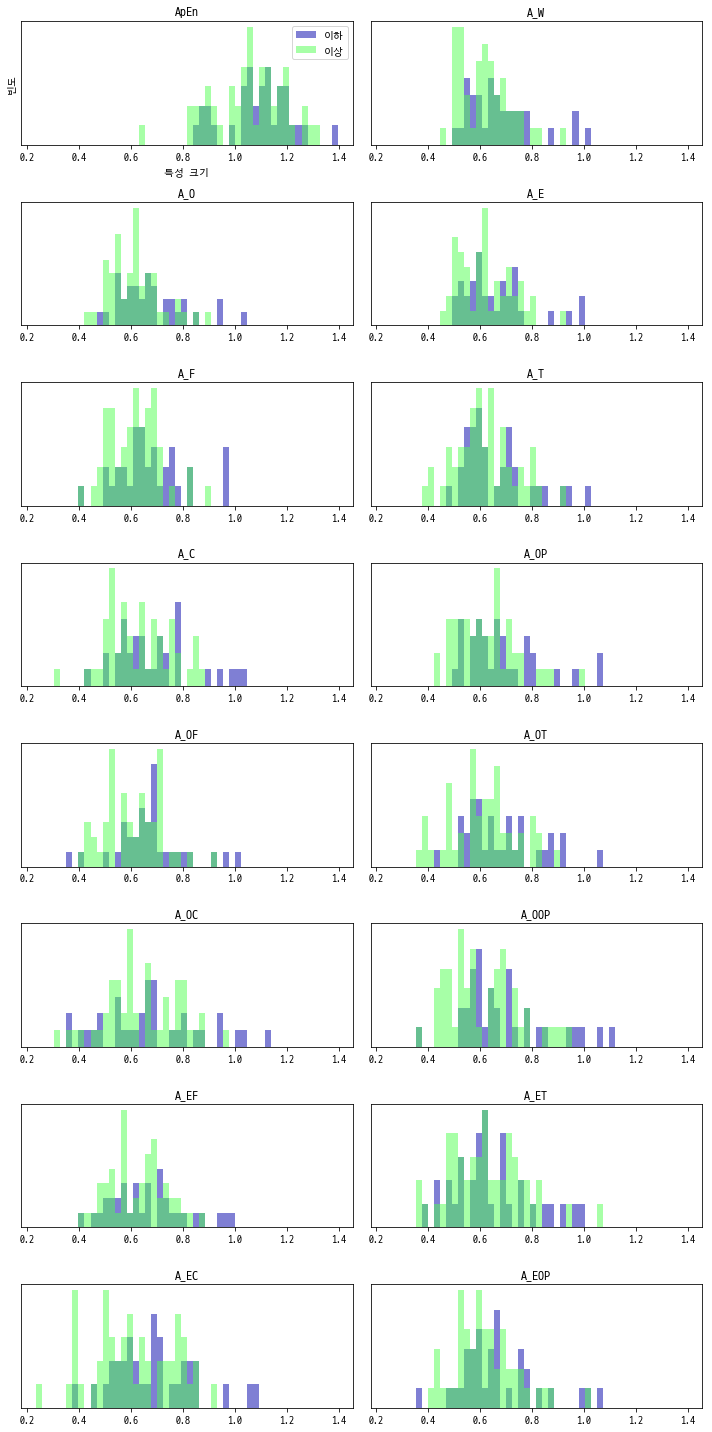

In [217]:
# 타깃(0,1) 데이터 히스트그램

fig, axes = plt.subplots(8,2, figsize=(10,20))
under=temp.loc[temp.target==0,:]
over=temp.loc[temp.target==1,:]

ax=axes.ravel()

for i in range(16):
    _, bins = np.histogram(temp.iloc[:,2:], bins=50)
    ax[i].hist(under.iloc[:,2+i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(over.iloc[:,2+i],bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(temp.columns[2+i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["이하","이상"], loc="best")
fig.tight_layout()

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    temp.iloc[:, 2:], temp.target, stratify=temp.target, random_state=42)

In [266]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    temp.iloc[:, 2:], temp.iloc[:,1], random_state=42)

In [254]:
temp.iloc[:,1]

0      480.3
1      721.0
2      229.8
3      481.7
4      367.1
5      300.0
6      416.6
7      579.2
8       90.2
9      785.7
10     223.3
11     341.0
12     510.4
13     107.7
14      75.2
15     210.1
16     316.7
17     167.2
18     152.9
19     661.0
20     342.3
21     422.9
22     430.0
23     336.4
24     273.0
25     541.5
26     663.4
27     453.7
28     188.0
29     760.4
       ...  
55     659.2
56      41.7
57     156.5
58     361.0
59     789.4
60     135.6
61     569.1
62     421.0
63     239.0
64     569.3
65     485.1
66     407.5
67     663.9
68     352.5
69    1042.0
70    1286.0
71     565.3
72     359.1
73     548.2
74     321.1
75     449.5
76      46.0
77     572.4
78     913.7
79     453.1
80     726.6
81     380.0
82     967.9
83     205.8
84     154.7
Name: s-cloz, Length: 85, dtype: float64

In [257]:
# KNN- KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(knn.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(knn.score(X_test, y_test)))

ValueError: Unknown label type: 'continuous'

In [263]:
y_train

39     294.5
28     188.0
9      785.7
64     569.3
5      300.0
45     583.5
31     558.9
34     534.0
44     556.1
84     154.7
16     316.7
65     485.1
7      579.2
69    1042.0
56      41.7
19     661.0
70    1286.0
25     541.5
53     132.0
13     107.7
61     569.1
3      481.7
17     167.2
38     631.3
8       90.2
67     663.9
6      416.6
36     272.2
76      46.0
62     421.0
       ...  
15     210.1
27     453.7
41     415.0
58     361.0
26     663.4
48     262.0
24     273.0
43     355.1
81     380.0
75     449.5
57     156.5
32     513.3
80     726.6
59     789.4
63     239.0
73     548.2
37     219.5
29     760.4
1      721.0
52     168.0
21     422.9
2      229.8
23     336.4
79     453.1
74     321.1
20     342.3
60     135.6
71     565.3
14      75.2
51     672.9
Name: s-cloz, Length: 63, dtype: float64

In [265]:
# scale 조정
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.fit(y_train.reshape(-1,1))
scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)
scaled_y_train=scaler.transform(y_train)
scaled_y_test=scaler.transform(y_test)
#knn.fit(scaled_X_train, y_train)
#print("훈련 세트 점수: {:.3f}".format(knn.score(X_train, y_train)))
#print("테스트 세트 점수: {:.3f}".format(knn.score(X_test, y_test)))

AttributeError: 'Series' object has no attribute 'reshape'

In [267]:
# LinearRegression
# 16 features --> target prediction

from sklearn.linear_model import LinearRegression

lr=LinearRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.390
테스트 세트 점수: -0.252


과소적합, 그러나 선형회귀는 매개변수가 없어서 복잡도를 올릴 수 없다.

In [232]:
# 릿지 테스트 - 과소적합인데 어떻게 되나??? 
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.124
테스트 세트 점수: 0.093


In [234]:
# LogisticRegression - 선형 분류(결정경계를 통한 분류)

from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression().fit(X_train, y_train);
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.635
테스트 세트 점수: 0.636


In [238]:
# DecisionTree

from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(max_depth=3,random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 점수: 0.841
테스트 세트 점수: 0.636


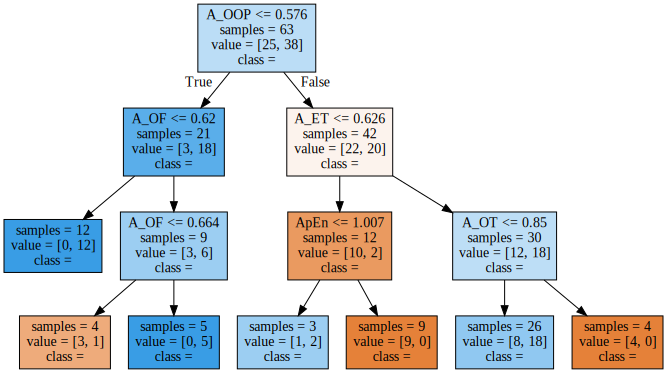

In [240]:
# <(이하)-34명, >(이상)-51명
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="duih.dot", class_names=["이하", "이상"],
                feature_names=temp.columns[2:], impurity=False, filled=True)

import graphviz

with open("duih.dot",encoding='UTF8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [241]:
print("특성 중요도: \n{}".format(tree.feature_importances_))

특성 중요도: 
[0.12308848 0.         0.         0.         0.         0.
 0.         0.         0.22419688 0.20451625 0.         0.25008454
 0.         0.19811385 0.         0.        ]


In [242]:
temp.columns[2:]

Index(['ApEn', 'A_W', 'A_O', 'A_E', 'A_F', 'A_T', 'A_C', 'A_OP', 'A_OF',
       'A_OT', 'A_OC', 'A_OOP', 'A_EF', 'A_ET', 'A_EC', 'A_EOP'],
      dtype='object')

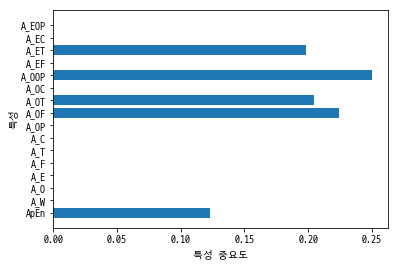

In [243]:
import matplotlib.pyplot as plt

plt.barh(range(temp.columns[2:].shape[0]), tree.feature_importances_, align='center')
plt.yticks(np.arange(temp.columns[2:].shape[0]), temp.columns[2:])
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.show()

결정트리 모델의 특성 중요도

In [244]:
# Random forest

#import mglearn
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=8, max_features=7, random_state=42); # default max_features=auto(sqr(n_features))
forest.fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 점수: 0.968
테스트 세트 점수: 0.682


In [245]:
# GradientBoostingClassifier

#import mglearn
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0); # 
gbrt.fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 점수: 1.000
테스트 세트 점수: 0.591


In [250]:
# default ---> 과대적합
#gbrt = GradientBoostingClassifier(random_state=0, max_depth=1); # 
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.001); # 
gbrt.fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 점수: 0.603
테스트 세트 점수: 0.591


GradientBoostingClassifier는 depth를 낮추는게 learning_rate를 줄이는 것보다 성능향상에 좋은 결과를 준다.

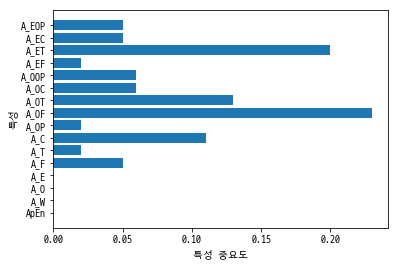

In [127]:
import matplotlib.pyplot as plt

plt.barh(range(temp.columns[2:].shape[0]), gbrt.feature_importances_, align='center')
plt.yticks(np.arange(temp.columns[2:].shape[0]), temp.columns[2:])
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.show()

그래디언트부스팅 모델의 특성 중요도